<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Alineamiento de una lámina de cuarto de onda </font>
</div>

Es necesario encontrar un método para encontrar el eje rápido de una lámina de cuarto de onda sin necesitar otra lámina de cuarto de onda ya calibrada.

In [1]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, np, degrees
import matplotlib.pyplot as plt

# Metodo 1

El metodo uno consiste en un interferómetro de Mach-Zehnder donde en cada brazo se genera una polarización lineal diferente. A la salida del interferómetro se coloca el retardador que se quiere medir (lámina de cuarto de onda, por ejemplo), y un polarizador de medida. El esquema se puede ver en la figura.

<img src="Metodo 1.png" /> 

## Parametros perfectos

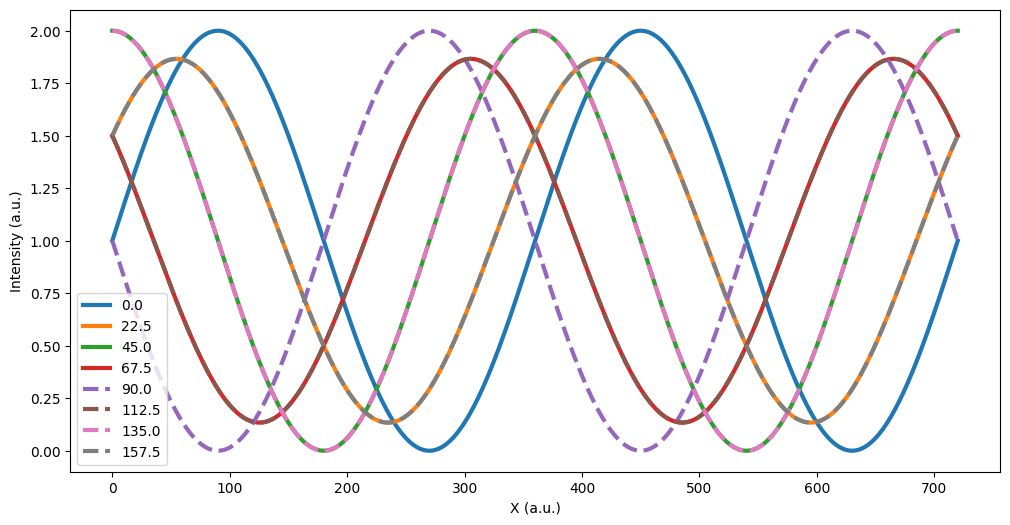

In [3]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=0*degrees)
E2 = Jones_vector().linear_light(azimuth=90*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

El resultado es perfecto. El máximo de más a la izquierda corresponde al acimut de 90º y el de más a la derecha al acimut de 0º.

Y si en lugar de 45º usamos 135º:

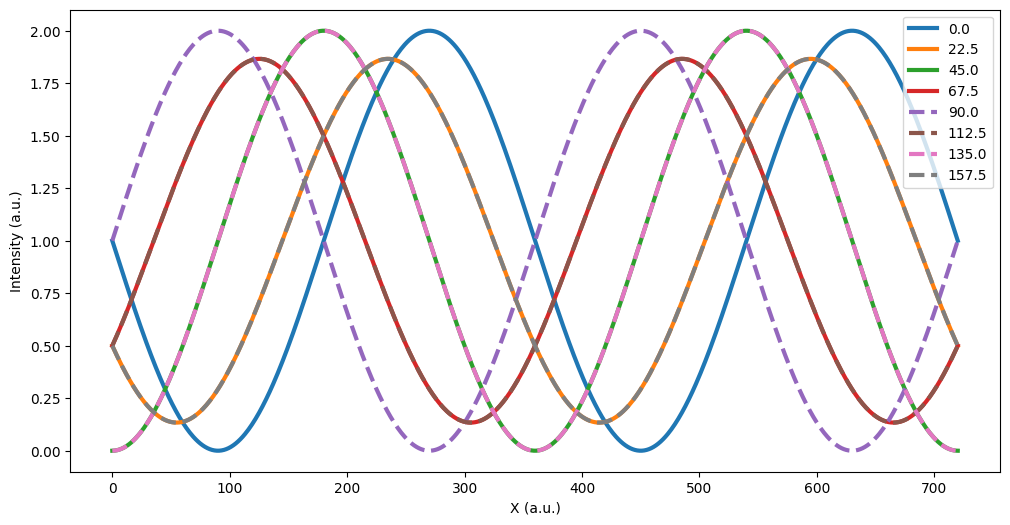

In [32]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=0*degrees)
E2 = Jones_vector().linear_light(azimuth=90*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

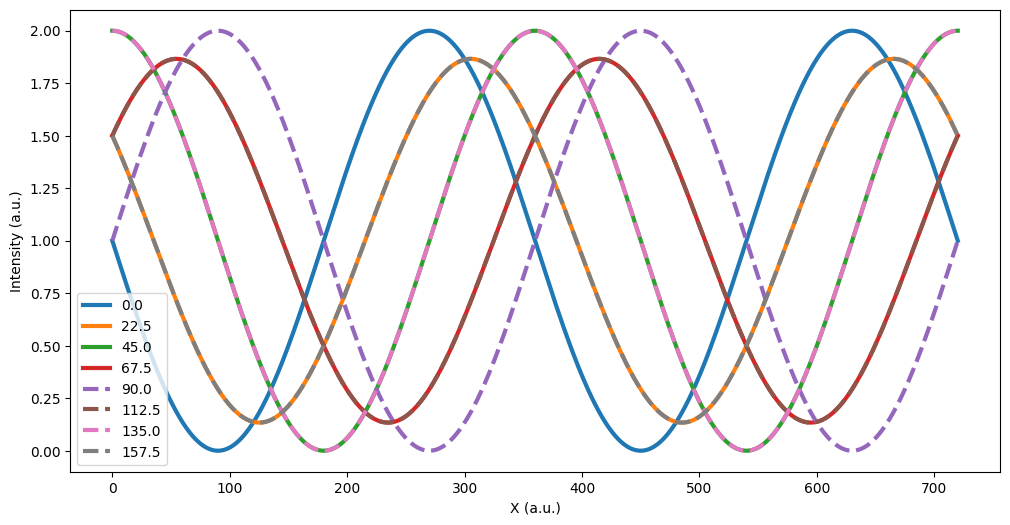

In [3]:
# Teoria
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

Ret = 90*degrees
# I = 2 + 2*np.cos(Fase) * (1 - 2 * np.sin(Ret/2)**2 * np.cos(2*Angles)**2) - 2*np.sin(Fase) * np.sin(Ret) * np.cos(2*Angles)
I = 1 - np.sin(Fase) * np.cos(2*Angles) * np.sin(Ret) + np.cos(Fase) * (np.cos(Ret) * np.cos(2*Angles) ** 2 + np.sin(2*Angles) ** 2)


if Nangles <= 10:
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

Hay un desplazamiento de las franjas para todos los ángulos, lo cual no nos importa.

## Desviacion de los parametros perfectos

### Error en el angulo del polarizador de un brazo

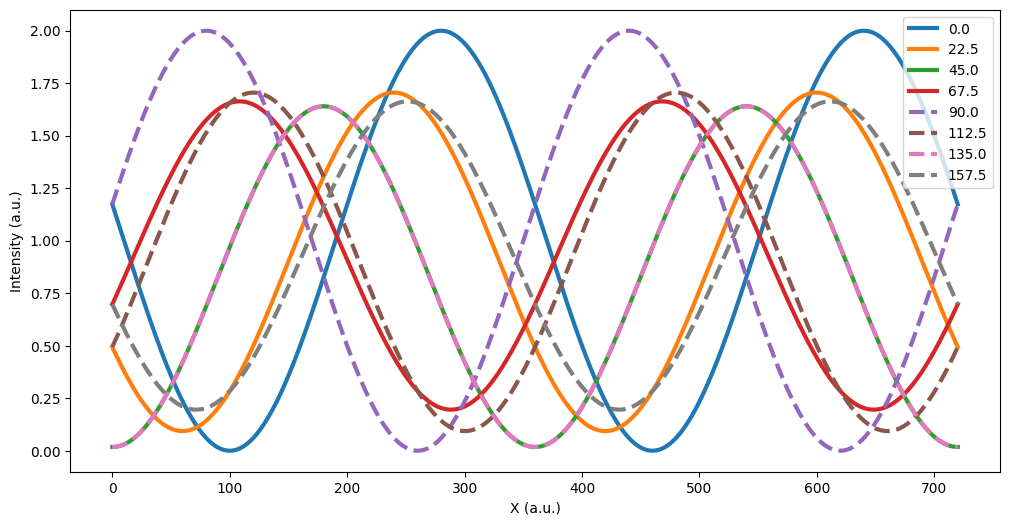

In [3]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=0*degrees)
E2 = Jones_vector().linear_light(azimuth=80*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

No es un problema ya que el maximo de más a la izquierda sigue siendo el de acimut de 90º y el de 0º el de la derecha, con los demás en medio.

### Error en el angulo del polariador de medida

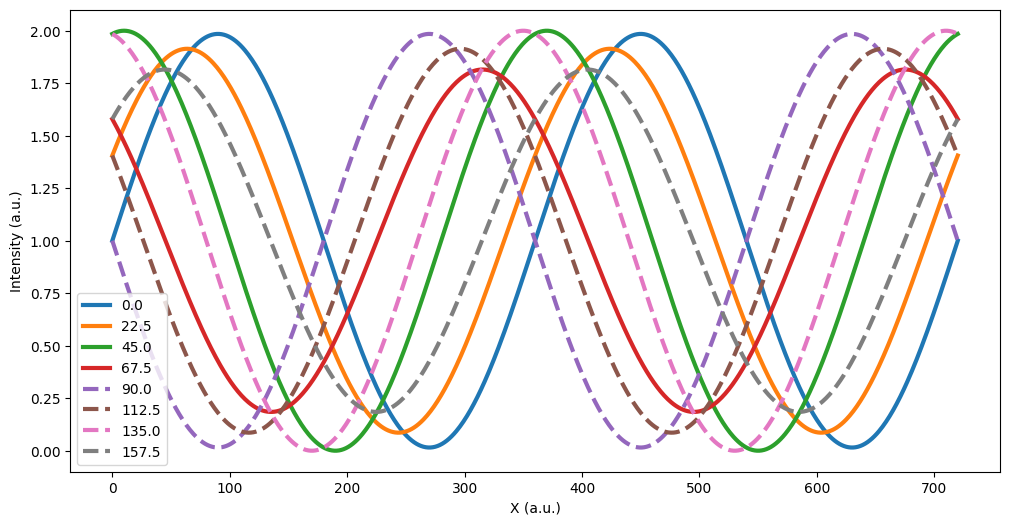

In [5]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=0*degrees)
E2 = Jones_vector().linear_light(azimuth=90*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=50*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

Sigue valiendo, simplemente se desdoblan algunas curvas que antes se superponían.

### Retardancia diferente de $\lambda/4$

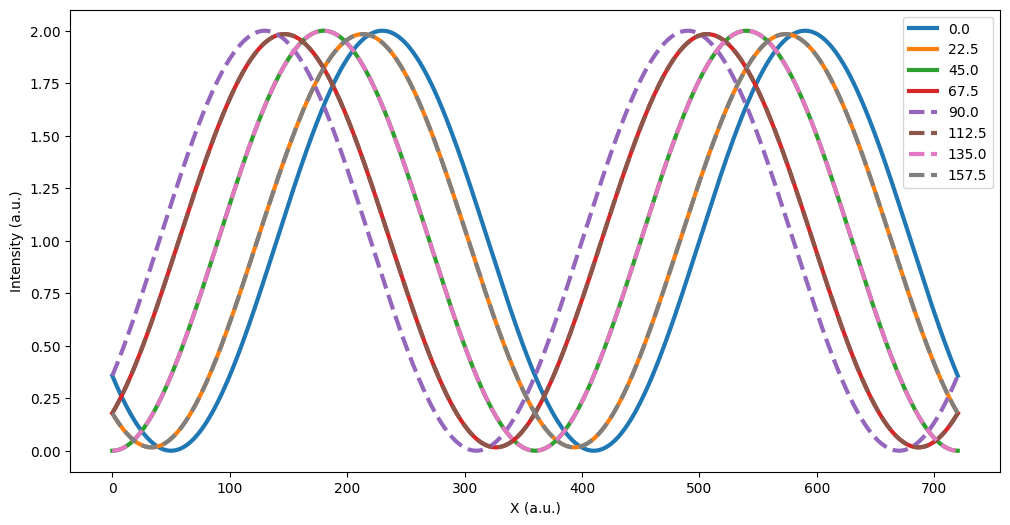

In [8]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=0*degrees)
E2 = Jones_vector().linear_light(azimuth=90*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=50*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

Sigue valiendo, solo cambia la diferencia de altura y los máximos se juntan.

### Polarizadores no ideales

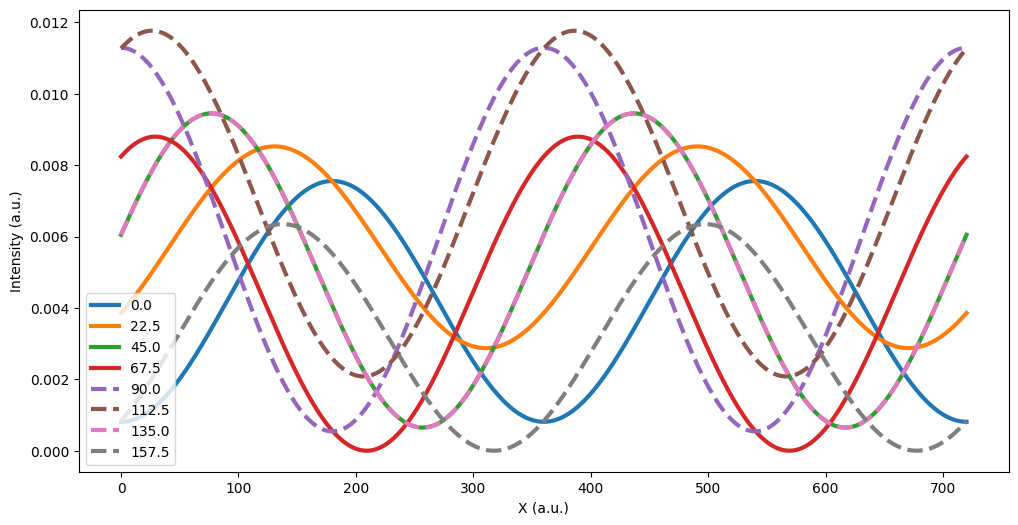

In [6]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E0 = Jones_vector().general_azimuth_ellipticity(azimuth=90*degrees, ellipticity=30*degrees)

E1 = Jones_matrix().diattenuator_linear(p2=0.1, azimuth=0*degrees) * E0
E2 = Jones_matrix().diattenuator_linear(p2=0.1, azimuth=90*degrees) * E0.add_global_phase(Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=90*degrees, azimuth=Angles)
P = Jones_matrix().diattenuator_linear(p1=0.1, azimuth=135*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

Las franjas tendrán difeente visibilidad, pero el método sigue funcionando.

### Los autoestados del retardador no son lineales

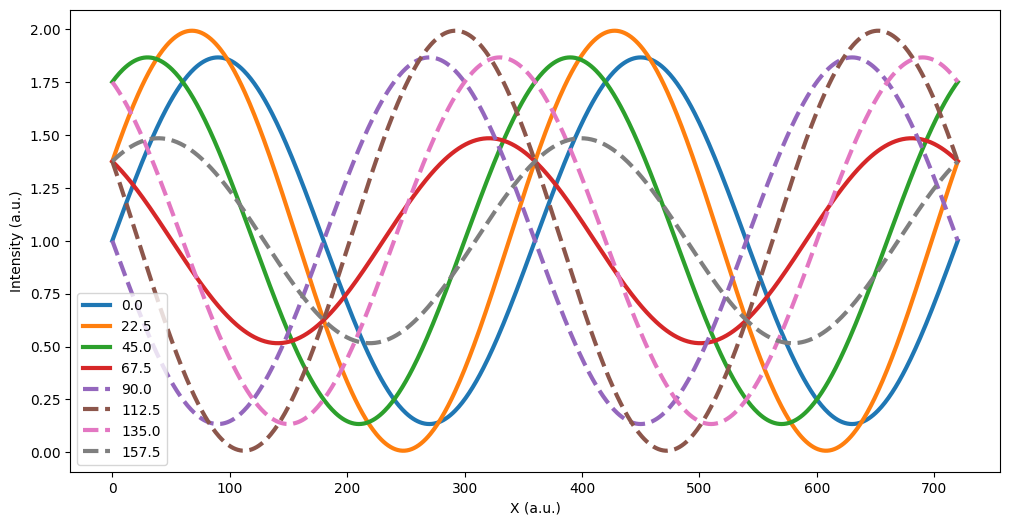

In [7]:
# Metodo 1
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=0*degrees)
E2 = Jones_vector().linear_light(azimuth=90*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_azimuth_ellipticity(R=90*degrees, azimuth=Angles, ellipticity=15*degrees)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

if Nangles <= 10:
    I = Efinal.parameters.intensity()
    plt.figure(figsize=(12,6))
    for ind in range(Nangles):
        ls = "-" if ind < Nangles/2 else "--"
        plt.plot(I[:,ind], linestyle=ls, linewidth=3)
    plt.xlabel("X (a.u.)")
    plt.ylabel("Intensity (a.u.)")
    plt.legend(legend)

else:
    Efinal.parameters.azimuth_ellipticity(draw=True)
    I = Efinal.parameters.intensity(draw=True)

Increible, pero parece que sigue valiendo prácticamente hasta que son circulares.

## Conclusión

Método válido aunque hay que tener cuidado con el signo de la fase global.

## Matemáticas

In [29]:
from sympy import *

In [33]:
theta, Delta, gamma, x = symbols("theta Delta gamma x", real=True)

In [24]:
E1 = cos(Delta/2) + 1j * sin(Delta/2) * (sin(2*theta) - cos(2*theta))
E2 = cos(Delta/2) * cos(gamma * x) + sin(Delta/2) * (sin(2*theta) + cos(2*theta)) * sin(gamma * x) + 1j * (sin(Delta/2) * (sin(2*theta) + cos(2*theta)) * cos(gamma * x) + cos(Delta/2) * sin(gamma * x))

In [25]:
E = E1 + E2
I = E * conjugate(E)
print(simplify(I))

(1.0*I*(sqrt(2)*sin(Delta/2)*sin(2*theta + pi/4)*cos(gamma*x) + sin(gamma*x)*cos(Delta/2)) + sqrt(2)*sin(Delta/2)*sin(gamma*x)*sin(2*theta + pi/4) - 1.0*sqrt(2)*I*sin(Delta/2)*cos(2*theta + pi/4) + cos(Delta/2)*cos(gamma*x) + cos(Delta/2))*(-1.0*I*(2*sqrt(2)*sin(Delta/2)*sin(theta)*cos(gamma*x)*cos(theta + pi/4) + sin(Delta/2 + gamma*x)) + sqrt(2)*sin(Delta/2)*sin(gamma*x)*sin(2*theta + pi/4) + 1.0*sqrt(2)*I*sin(Delta/2)*cos(2*theta + pi/4) + cos(Delta/2)*cos(gamma*x) + cos(Delta/2))


In [49]:
real = cos(Delta) * cos(gamma) - sin(Delta) * sin(gamma) * (sin(theta) + cos(theta)) + cos(Delta)
imag = cos(Delta) * sin(gamma) + sin(Delta) * cos(gamma) * (sin(theta) + cos(theta)) + sin(Delta) * (sin(theta) - cos(theta))

In [50]:
I = expand(real**2 + imag**2)
print(I, "\n")
print(simplify(I))

sin(Delta)**2*sin(gamma)**2*sin(theta)**2 + 2*sin(Delta)**2*sin(gamma)**2*sin(theta)*cos(theta) + sin(Delta)**2*sin(gamma)**2*cos(theta)**2 + sin(Delta)**2*sin(theta)**2*cos(gamma)**2 + 2*sin(Delta)**2*sin(theta)**2*cos(gamma) + sin(Delta)**2*sin(theta)**2 + 2*sin(Delta)**2*sin(theta)*cos(gamma)**2*cos(theta) - 2*sin(Delta)**2*sin(theta)*cos(theta) + sin(Delta)**2*cos(gamma)**2*cos(theta)**2 - 2*sin(Delta)**2*cos(gamma)*cos(theta)**2 + sin(Delta)**2*cos(theta)**2 - 4*sin(Delta)*sin(gamma)*cos(Delta)*cos(theta) + sin(gamma)**2*cos(Delta)**2 + cos(Delta)**2*cos(gamma)**2 + 2*cos(Delta)**2*cos(gamma) + cos(Delta)**2 

4*sin(Delta)**2*sin(theta)**2*cos(gamma) - 4*sin(Delta)**2*cos(gamma) - 4*sin(Delta)*sin(gamma)*cos(Delta)*cos(theta) + 2*cos(gamma) + 2


In [34]:
P = Matrix([[1, 1], [1, 1]]) / 2
Q = Matrix([[cos(Delta/2) + 1j * sin(Delta/2) * cos(2*theta) , 1j * sin(Delta/2) * sin(2*theta)], 
            [1j * sin(Delta/2) * sin(2*theta), cos(Delta/2) - 1j * sin(Delta/2) * cos(2*theta)]])

E1 = Matrix([[0], [1]])
E2 = Matrix([[cos(gamma*x) + 1j * sin(gamma*x)], [0]])

In [37]:
E1f = P * Q * E1
print(factor(simplify(E1f)))

Matrix([[0.5*I*sin(Delta/2)*sin(2*theta) - 0.5*I*sin(Delta/2)*cos(2*theta) + 0.5*cos(Delta/2)], [0.5*I*sin(Delta/2)*sin(2*theta) - 0.5*I*sin(Delta/2)*cos(2*theta) + 0.5*cos(Delta/2)]])


In [47]:
E2f = P * Q * E2
print(simplify(E2f), "\n")

expr = 0.5*(1j*sin(Delta/2)*sin(2*theta) + 1j*sin(Delta/2)*cos(2*theta) + cos(Delta/2)) * (cos(gamma*x) + 1j * sin(gamma*x))
print(expand(expr))

Matrix([[0.5*(I*sin(Delta/2)*sin(2*theta) + I*sin(Delta/2)*cos(2*theta) + cos(Delta/2))*exp(I*gamma*x)], [0.5*(I*sin(Delta/2)*sin(2*theta) + I*sin(Delta/2)*cos(2*theta) + cos(Delta/2))*exp(I*gamma*x)]]) 

-0.5*sin(Delta/2)*sin(2*theta)*sin(gamma*x) + 0.5*I*sin(Delta/2)*sin(2*theta)*cos(gamma*x) - 0.5*sin(Delta/2)*sin(gamma*x)*cos(2*theta) + 0.5*I*sin(Delta/2)*cos(2*theta)*cos(gamma*x) + 0.5*I*sin(gamma*x)*cos(Delta/2) + 0.5*cos(Delta/2)*cos(gamma*x)
